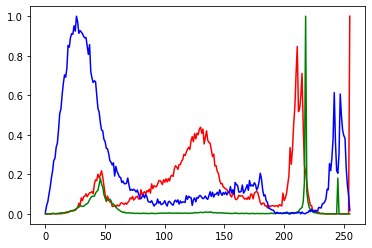

In [11]:
import cv2
import numpy
from matplotlib import pyplot

img1 = cv2.imread('image2/1.png')
img2 = cv2.imread('image2/2.png')
img3 = cv2.imread('image2/3.png')

H1 = cv2.calcHist([img1], [1], None, [256], [0, 256])
H1 = cv2.normalize(H1, H1, 0, 1, cv2.NORM_MINMAX, -1)
H2 = cv2.calcHist([img2], [1], None, [256], [0, 256])
H2 = cv2.normalize(H2, H2, 0, 1, cv2.NORM_MINMAX, -1)
H3 = cv2.calcHist([img3], [1], None, [256], [0, 256])
H3 = cv2.normalize(H3, H3, 0, 1, cv2.NORM_MINMAX, -1)
pyplot.plot(range(256), H1, 'r')
pyplot.plot(range(256), H2, 'g')
pyplot.plot(range(256), H3, 'b')
pyplot.show()
#问题在于没有裁剪

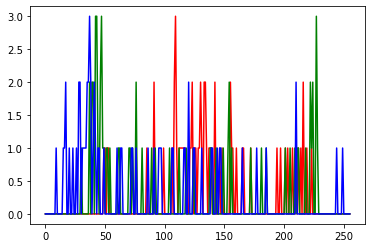

In [23]:
img1 = cv2.imread('image3/1.png')
img2 = cv2.imread('image3/2.png')
img3 = cv2.imread('image3/3.png')

H1 = cv2.calcHist([img1], [1], None, [256], [0, 256])
#H1 = cv2.normalize(H1, H1, 0, 1, cv2.NORM_MINMAX, -1)
H2 = cv2.calcHist([img2], [1], None, [256], [0, 256])
#H2 = cv2.normalize(H2, H2, 0, 1, cv2.NORM_MINMAX, -1)
H3 = cv2.calcHist([img3], [1], None, [256], [0, 256])
#H3 = cv2.normalize(H3, H3, 0, 1, cv2.NORM_MINMAX, -1)
pyplot.plot(range(256), H1, 'r')
pyplot.plot(range(256), H2, 'g')
pyplot.plot(range(256), H3, 'b')
pyplot.show()
#色素的直方图对比，问题在于是对于全局去进行了对比，没有对局部进行了对比

In [24]:
similarity1 = cv2.compareHist(H1, H2, 1)
print(similarity1)
similarity2 = cv2.compareHist(H1, H3, 1)
print(similarity2)
similarity3 = cv2.compareHist(H2, H3, 1)
print(similarity3)
#这里简单的用了卡方作比较

54.0
53.5
51.83333333333333


In [28]:
#考虑图片hash
#最简单的平均hash
#1.缩放图片，一般大小为8*8，64个像素值。转化为灰度图
#2计算平均值：计算进行灰度处理后图片的所有像素点的平均值，直接用numpy中的mean()计算即可。
#3比较像素灰度值：遍历灰度图片每一个像素，如果大于平均值记录为1，否则为0.
#4得到信息指纹：组合64个bit位，顺序随意保持一致性。
#5最后比对两张图片的指纹，获得汉明距离即可。
#image4文件里面都是这样的图片
#这里使用opencv的code

import numpy as np

img1 = cv2.imread("image2/1.png")
img2 = cv2.imread("image2/2.png")
img3 = cv2.imread("image2/3.png")
img4 = cv2.imread("image2/4.png")
img5 = cv2.imread("image2/5.png")
#调整到8*8
img1 = cv2.resize(img1,(8,8))
img2 = cv2.resize(img2,(8,8))
img3 = cv2.resize(img3,(8,8))
img4 = cv2.resize(img4,(8,8))
img5 = cv2.resize(img5,(8,8))

#转化为灰度图
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
gray4 = cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY)
gray5 = cv2.cvtColor(img5,cv2.COLOR_BGR2GRAY)

# 输入灰度图，返回hash
def getHash(image):
    avreage = np.mean(image)  #计算像素平均值
    hash = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] > avreage:
                hash.append(1)
            else:
                hash.append(0)
    return hash

# 计算汉明距离
def Hamming_distance(hash1, hash2):
    num = 0
    for index in range(len(hash1)):
        if hash1[index] != hash2[index]:
            num += 1
    return num

#获取哈希
hash1 = getHash(gray1)
hash2 = getHash(gray2)
hash3 = getHash(gray3)
hash4 = getHash(gray4)
hash5 = getHash(gray5)

hash1

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1]

In [29]:

#打印汉明距离
print(Hamming_distance(hash3,hash1))
print(Hamming_distance(hash3,hash2))
print(Hamming_distance(hash3,hash4))
print(Hamming_distance(hash3,hash5))


10
9
32
19


In [30]:
#用离散余弦进行的低频提取的感知hash
#phash
def phash(path):    
# 加载并调整图片为32*32的灰度图片    
    img = cv2.imread(path)    
    img1 = cv2.resize(img, (32, 32),cv2.COLOR_RGB2GRAY)    
# 创建二维列表    
    h, w = img.shape[:2]    
    vis0 = np.zeros((h, w), np.float32)    
    vis0[:h, :w] = img1    
# DCT二维变换    
# 离散余弦变换，得到dct系数矩阵    
    img_dct = cv2.dct(cv2.dct(vis0))    
    img_dct.resize(8,8)    
# 把list变成一维list    
    img_list = np.array().flatten(img_dct.tolist())    
# 计算均值    
    img_mean = cv2.mean(img_list)    
    avg_list = ['0' if i<img_mean else '1' for i in img_list]    
    return ''.join(['%x' % int(''.join(avg_list[x:x+4]),2) for x in range(0,64,4)])
#由于我对于DCT变换不算很了解，暂时这块不讲，而且貌似也没有dhash好


In [33]:
#差值感知算法
#dhash相比pHash，dHash的速度要快的多，相比aHash，dHash在效率几乎相同的情况下的效果要更好，它是基于渐变实现的。
#计算差异值：dHash算法工作在相邻像素之间，这样每行9个像素之间产生了8个不同的差异，一共8行，则产生了64个差异值，或者是32位01字符串。
#获得指纹：如果左边的像素比右边的更亮，则记录为1，否则为0.


def dhash(image1,image2):
    image1 = cv2.resize(image1,(9,8))
    image2 = cv2.resize(image2,(9,8))
    gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)  #切换至灰度图
    gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
    hash1 = dhashcaulate(gray1)
    hash2 = dhashcaulate(gray2)
    return Hamming_distance(hash1,hash2)
 
def dhashcaulate(gray):
    hash_str = ''
    for i in range(8):
        for j in range(8):
            if gray[i, j] > gray[i, j + 1]:
                hash_str = hash_str + '1'
            else:
                hash_str = hash_str + '0'
    return hash_str

img3 = cv2.imread("image2/3.png")
img3 = cv2.resize(img3,(9,8))
gray3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
dhashcaulate(gray3)

'0110100111001010101101101001010001110101010110010110110111001101'